Dataset 'hearing_test.csv' contains 5000 participants data to study affect of age and physical health etc. on hearing loss.

Dataset has target label as:

test_result ==> 0 if test didn't pass

test_result ==> 1 if test got pass

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/sample_data/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# **Exploratory Data Analysis:**

In [3]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

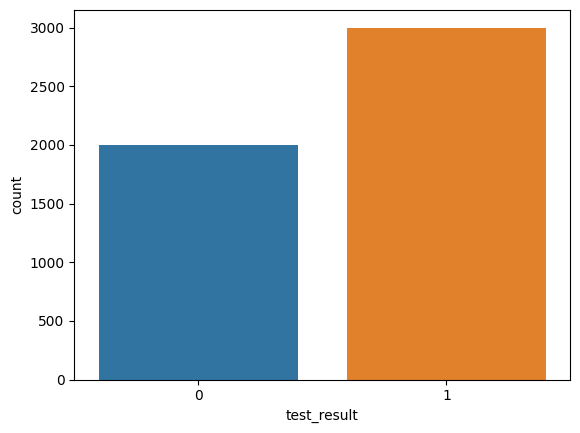

In [5]:
sns.countplot(x = 'test_result', data=df);

So, most of the people in our dataset has passed the test.

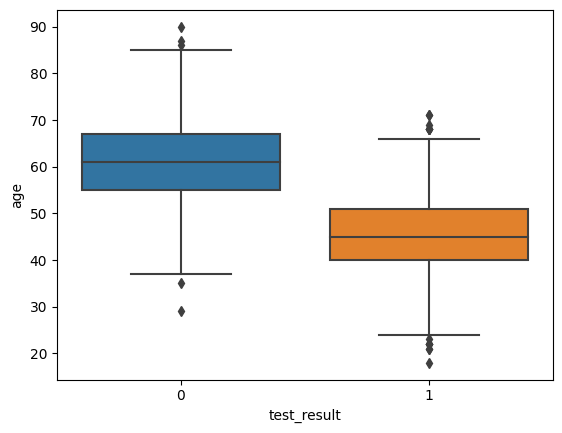

In [7]:
sns.boxplot(x = 'test_result', y = 'age', data = df);

It shows that people with more age couldn't pass the hearing test, which is realistic fact.

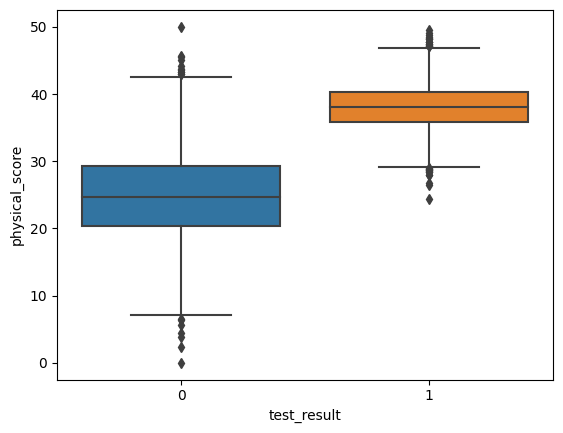

In [8]:
sns.boxplot(x = 'test_result', y = 'physical_score', data=df);

It shows participants who have high test score are going to pass the hearing test.

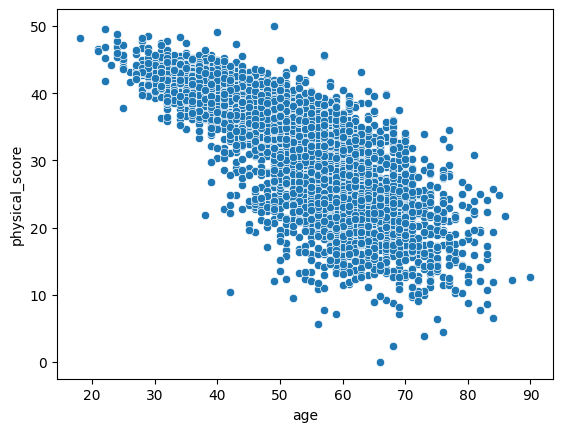

In [9]:
sns.scatterplot(x = 'age', y = 'physical_score', data = df);

It shows that people with high age has less score in test. And from the box plot, we can see people with less score failed hearing test which is also a fact.

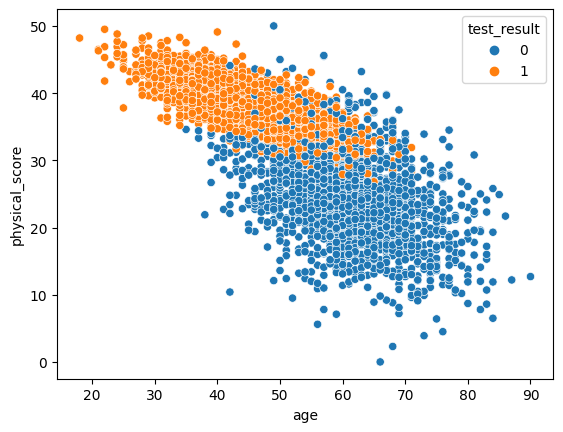

In [10]:
sns.scatterplot(x = 'age',  y= 'physical_score', data = df, hue = 'test_result');

It means people with less age (younger people) has achieved better physical score and have passed the test.

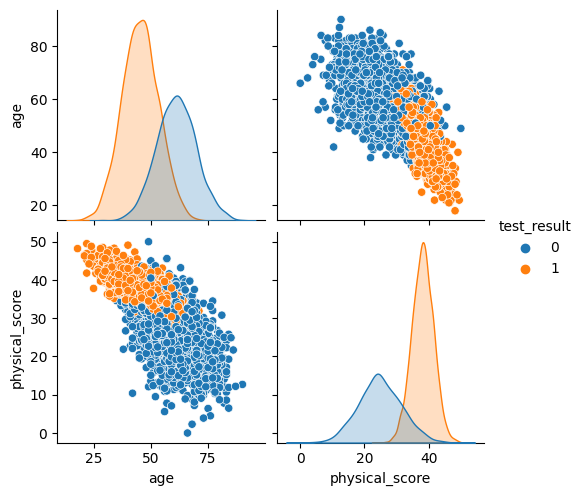

In [12]:
sns.pairplot(df, hue = 'test_result');

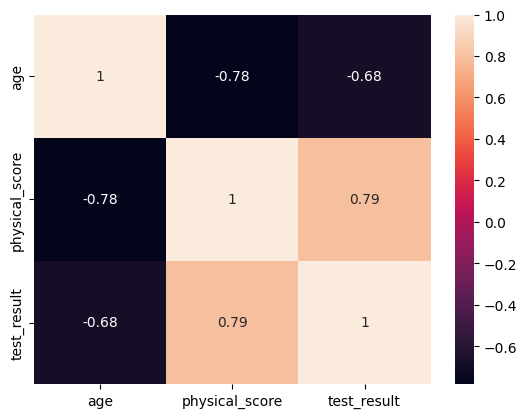

In [13]:
sns.heatmap(df.corr(), annot = True);

Age is -ve because as age increases, you're likely to pass the test.

Also, physical_score is more correlated to test_result, because definitely, one can easily tell from physical score about if the test is passed or not as compared to age.

**Nota Bene:**

All columns are numeric why not to apply linear regression on it???


Brooohhh!!! It is classification problem. so apply logistic regression on it. Also, test_Result values are categorical.

We can't make scatterplot of one categorical and one continous feature. Both should be continous.

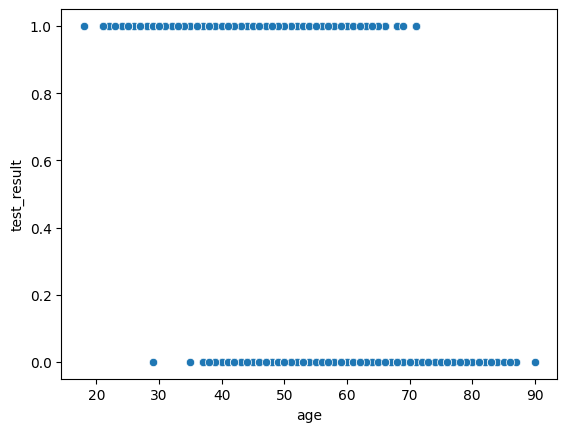

In [15]:
sns.scatterplot(x = 'age', y = 'test_result', data = df);

Ridiculous!

We can also make 3D scatterplot to see all features at one place.

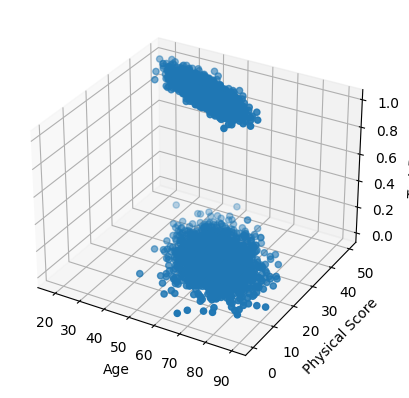

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'])

ax.set_xlabel('Age')
ax.set_ylabel('Physical Score')
ax.set_zlabel('Test Result');


# **Model Training:**

In [26]:
X = df.drop('test_result', axis  = 1)
y = df['test_result']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LogisticRegression

model  = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [31]:
predictions = model.predict(X_test)

In [32]:
predictions

array([0, 1, 1, ..., 0, 1, 1])

Let's check the probabilities of belonging to these predicted classes.

In [33]:
predictions = model.predict_proba(X_test)

In [34]:
predictions

array([[9.93635282e-01, 6.36471762e-03],
       [3.75991552e-02, 9.62400845e-01],
       [7.62374487e-04, 9.99237626e-01],
       ...,
       [9.73642398e-01, 2.63576024e-02],
       [3.68437674e-03, 9.96315623e-01],
       [2.34872142e-03, 9.97651279e-01]])